In [14]:
import os
import sys
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score

In [15]:
### Format data frame from a folder of .cif files
# from DataFormatting import *
# pro_df = protein_data_frame('[FOLDER GOES HERE]', 'protein_data_frame.csv')

### Import data frame from previously formatted csv
pro_df = pd.read_csv('protein_data_frame.csv', index_col=0)

In [16]:
print(pro_df)

      B     N  F     C  G  SE  R     O      H   P  ...  MHW  DGL  GLY  TPO  \
7VDU  0   408  0  1557  0   0  0   418      0   0  ...    0    0   17    0   
5Q14  0   676  0  2568  0   0  0   741      0   0  ...    0    0    7    0   
5I0W  0   423  0  1686  0   0  0   509      0   0  ...    0    0   20    0   
7K8O  0   563  0  2095  0   0  0   667      0   0  ...    0    0   33    0   
7G0A  0   196  0   754  0   0  0   230      0   0  ...    0    0   11    0   
...  ..   ... ..   ... ..  .. ..   ...    ...  ..  ...  ...  ...  ...  ...   
4XB8  0  1038  0  3793  0   0  0  1169      0   0  ...    0    0   32    0   
4Q9W  0   600  0  2382  0   0  0   715      0   0  ...    0    0   18    0   
3ZJT  0  1415  0  4924  0   0  0  1801      0  81  ...    0    0   60    0   
4WGX  0  2485  0  9073  0   0  0  2715  14268   0  ...    0    0   46    0   
5SY7  0   941  0  3239  0   0  0  1065      0  40  ...    0    0   47    0   

      YCM  doub  trip  sing  OLIG_COUNT  SYMMETRY  
7VDU    0  

In [17]:
### Partition the data frame into a training set and a testing set. 
columns = ['SYMMETRY']
# columns.insert(0, 'OLIG_COUNT')

test_data = pro_df.sample(pro_df.shape[0]//5)
test_x = test_data.drop(columns=columns,axis=1)
test_y = test_data['SYMMETRY']
print('C2 symmetries in test data :',test_y.astype(bool).sum(axis=0),'/',test_y.size)

train_data = pro_df.drop(test_data.index)
train_x = train_data.drop(columns=columns,axis=1)
train_y = train_data['SYMMETRY']
print('C2 symmetries in train data :',train_y.astype(bool).sum(axis=0),'/',train_y.size)

C2 symmetries in test data : 243 / 997
C2 symmetries in train data : 943 / 3992


In [18]:
#Fit an XGBoost model to the data
model = XGBClassifier()
model.fit(train_x,train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [19]:
# predict the target on the train dataset
predict_train = model.predict(train_x)
print('Target on train data',predict_train) 

Target on train data [0 0 1 ... 0 0 0]


In [20]:
# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('Accuracy score on train dataset : ', accuracy_train)

Accuracy score on train dataset :  1.0


In [21]:
# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data', predict_test) 

Target on test data [0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1
 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1
 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 1 

In [22]:
# Accuracy score on test dataset
accuracy_test = accuracy_score(test_y, predict_test)
print('Accuracy score on test dataset : ', accuracy_test)
print('Mode accuracy on test dataset  : ', test_y.value_counts().max()/test_y.size)

Accuracy score on test dataset :  0.9077231695085256
Mode accuracy on test dataset  :  0.7562688064192578


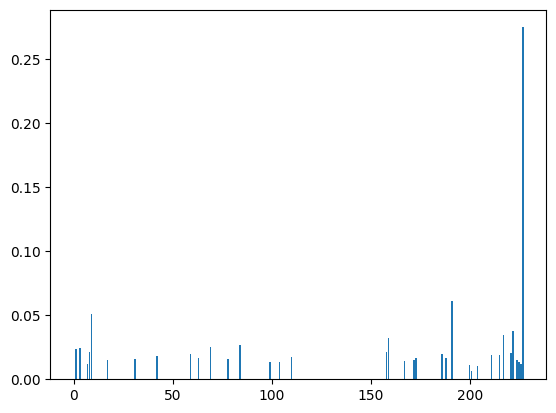

In [23]:
#Which columns were most important in determining if the protein had C2 symmetry?
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

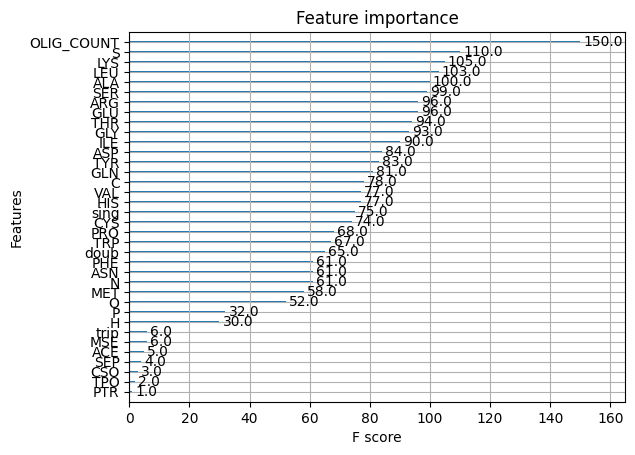

In [24]:
plot_importance(model)